# investigating hypoxic control treatment

this treatment resulted in 3 pairwise comparisons with DMGs - interested if all of these DMGs are unique to hypoxia control (HC)

In [1]:
library(tidyverse)
library(ggvenn)
library(RColorBrewer)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: grid



### loading and formatting

In [2]:
# importing csv files

# control control vs. hypoxic control
CC_HC <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/CC_vs_HC.csv')

# control hypoxic vs. hypoxic control
CH_HC <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/CH_vs_HC.csv')

# hypoxic hypoxic vs. hypoxic control
HH_HC <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/HH_vs_HC.csv')


now want to pull out only the significant DMGs for all 3 dfs (adjusted p-value < 0.05)

In [3]:
# control control vs. hypoxic control
sig_CC_HC <- filter(CC_HC, CC_HC$padj < 0.05)
dim(sig_CC_HC) # 20 total sig DMGs

# control hypoxic vs. hypoxic control
sig_CH_HC <- filter(CH_HC, CH_HC$padj < 0.05)
dim(sig_CH_HC) # 258 total sig DMGs

# hypoxic hypoxic vs. hypoxic control
sig_HH_HC <- filter(HH_HC, HH_HC$padj < 0.05)
dim(sig_HH_HC) # 124 total sig DMGs

[1] 20  7

[1] 258   7

[1] 124   7

### Venn diagram of all sig. DMGs

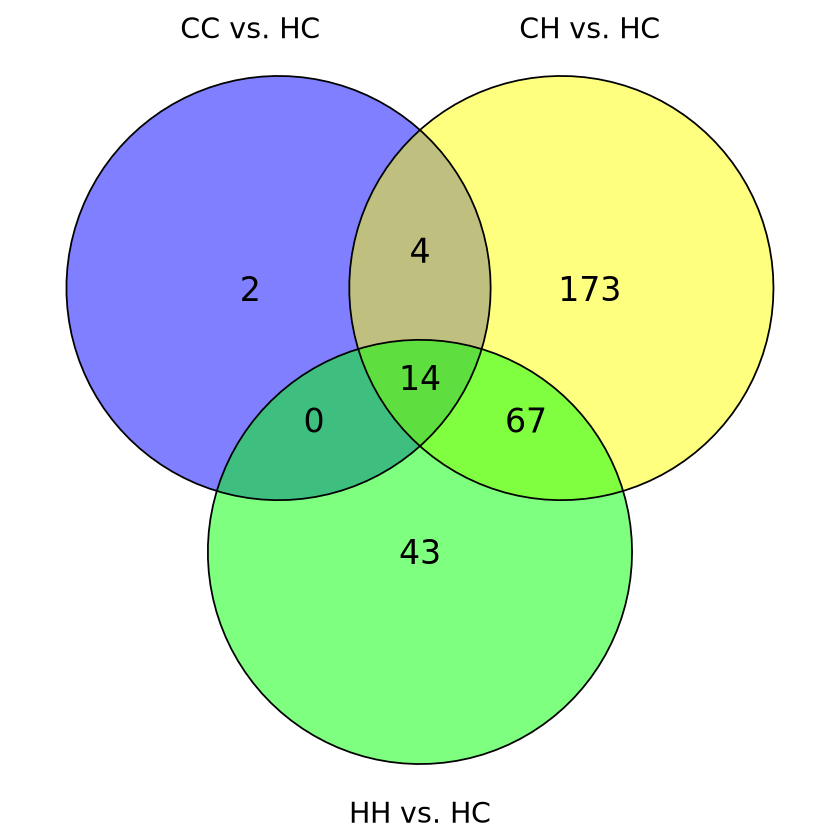

In [4]:
x = list(A = sig_CC_HC$X,
         B = sig_CH_HC$X, 
         C = sig_HH_HC$X)

names(x) <- c('CC vs. HC',
              'CH vs. HC',
              'HH vs. HC')

ggvenn(x,
      set_name_size = 6,
       text_size = 7,
      stroke_size = 0.5, 
       show_percentage = FALSE)

### shared sig DMGs for the pairwise comparisons

In [47]:
# pulling out the 14 shared genes

# Merge the data frames on the 'gene' column
shared_genes14 <- Reduce(function(x, y) merge(x, y, by = "X"), list(sig_CC_HC, sig_CH_HC, sig_HH_HC))

shared_genes14 <- as.data.frame(shared_genes14)
                    
# View the result
dim(shared_genes14)


[1] 14 19

pulling out the **81 shared genes between HH vs. HC and CH vs. HC**

In [46]:
# pulling out the 81 shared genes

# Merge the data frames on the 'gene' column
shared_genes81 <- Reduce(function(x, y) merge(x, y, by = "X"), list(sig_CH_HC, sig_HH_HC))
                    
shared_genes81 <- as.data.frame(shared_genes81)

# View the result
dim(shared_genes81)


[1] 81 13

pulling out the **67 genes shared ONLY between HH vs. HC and CH vs. HC**

In [45]:
# to remove the 14 genes that are shared between all the comparisons, and to only look at those shared between just these two...
shared_genes67 <- shared_genes81[!shared_genes81$X %in% shared_genes14$X, ]
dim(shared_genes67)

[1] 67 13

pulling out the **18 genes shared bewteen CC vs. HC and CH vs. HC**

In [44]:
# pulling out the 18 shared genes

# Merge the data frames on the 'gene' column
shared_genes18 <- Reduce(function(x, y) merge(x, y, by = "X"), list(sig_CC_HC, sig_CH_HC))  
shared_genes18 <- as.data.frame(shared_genes18)

dim(shared_genes18)

[1] 18 13

pulling out the **4 genes shared between ONLY CC vs. HC and CH vs. HC**

In [42]:
# to remove the 4 genes that are shared between all the comparisons, and to only look at those shared between just these two...
shared_genes4 <- shared_genes18[!shared_genes18$X %in% shared_genes14$X, ]
dim(shared_genes4)

[1]  4 13

### unique sig DMGs for pairwise comparison

pulling out the **173 unique sig DMGs for CH vs. HC**

In [39]:
unique_CH_HC <- sig_CH_HC[!sig_CH_HC$X %in% c(shared_genes14$X, shared_genes4$X, shared_genes67$X), ]
dim(unique_CH_HC)

[1] 173   7

pulling out the **2 unique sig DMGs for CC vs. HC**

In [40]:
unique_CC_HC <- sig_CC_HC[!sig_CC_HC$X %in% c(shared_genes14$X, shared_genes4$X), ]
dim(unique_CC_HC)

[1] 2 7

pulling out the **43 unique sig DMGs for HH vs. HC**

In [41]:
unique_HH_HC <- sig_HH_HC[!sig_HH_HC$X %in% c(shared_genes14$X, shared_genes67$X), ]
dim(unique_HH_HC)

[1] 43  7

Now have multiple dfs that contain shared and unique sig DMGs from the Venn diagram of pairwise comparisons with HC

**Shared sig DMGs**:
- shared_genes14 - shared between all 3 comparisons
- shared_genes67 - shared *ONLY* between HH vs. HC and CH vs. HC
- shared_genes81 - shared between HH vs. HC and CH vs. HC (including the 14 that are shared between all)
- shared_genes18 - shared between CC vs. HC and CH vs. HC (including the 14 that are shared between all)
- shared_genes4 - shared *ONLY* between CC vs. HC and CH vs. HC

**Unique sig DMGs**:
- unique_HH_HC - 43 sig DMGs
- unique_CH_HC - 173 sig DMGs
- unique_CC_HC - 2 sig DMGs

## Functional categories of shared DMGs